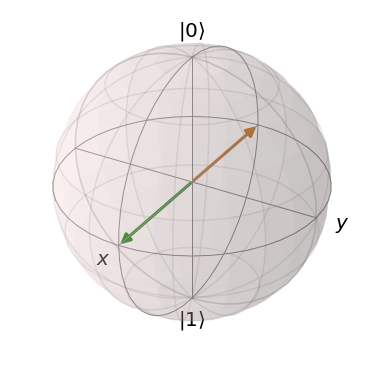

In [7]:
from qutip import *
from numpy import sin, cos, array, sqrt, zeros, exp, pi

b = Bloch()

# Angles for Measurement Basis
theta_m = pi/2
phi_m = 0

# Angles for Energy operator
theta_h = pi/2
phi_h = 0

# Hamiltonian
sigma_n = zeros([2,2], complex)
sigma_n[0][0] = cos(theta_h)
sigma_n[0][1] = exp(-1j*phi_h)*sin(theta_h)
sigma_n[1][0] = exp(1j*phi_h)*sin(theta_h)
sigma_n[1][1] = -cos(theta_h)

H = Qobj(sigma_n).unit()

# Energy eigenstates
u = array([cos(theta_h/2),exp(1j*phi_h)*sin(theta_h/2)], complex) # 'Up' n
d = array([sin(theta_h/2),-exp(1j*phi_h)*cos(theta_h/2)], complex) # 'Down' n

up_n = Qobj(u).unit()
down_n = Qobj(d).unit()

b.add_states(up_n)
b.add_states(down_n)
b.show()

In [28]:
from numpy import linspace

# Add a vector/state to show initial state
theta_s = pi
phi_s = pi/4

init = array([cos(theta_s/2),exp(1j*phi_s)*sin(theta_h/2)], complex)
psi_init = Qobj(init).unit()

# Find time-evolved state

tlist = range(60) # Needs to have integer values
psi_t = sesolve(H, psi_init, tlist)

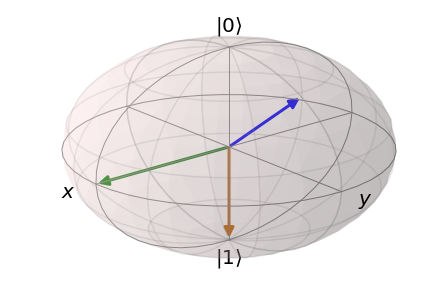

<Figure size 360x360 with 0 Axes>

In [29]:

# install ffmpeg
from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig, azim = -40, elev = 30)
bsphere = Bloch(axes = ax)

def animate(i):
    bsphere.clear()
    bsphere.add_states(up_n)
    bsphere.add_states(psi_init)
    bsphere.add_states(psi_t.states[i]) # Time evolved state
    bsphere.make_sphere()
    return ax

def init():
    bsphere.vector_colour = ['r']
    return ax

ani = animation.FuncAnimation(fig, animate, frames = tlist, init_func=init, repeat=False)
ani.save('bloch_sphere.mp4', fps=20)
#plt.show()